In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import gridspec

# Relaxation methods for solving the Laplace equation

Below we explore the relaxation methods discussed in class for solving the Laplace equation, given by:
$$\frac{\partial^2\Phi(x,y)}{\partial x^2}+\frac{\partial^2\Phi(x,y)}{\partial y^2}=0.$$
The general approach is to write this equation as a diffusion equation with a ficticious time,
$$\frac{\partial \Phi}{\partial t}=\mu\left(
\frac{\partial^2 \Phi}{\partial x^2}+\frac{\partial^2 \Phi}{\partial y^2}\right),$$
and find the "steady-state" solution by propegating in time.

We solve this auxiliary diffusion equation by discretizing and using the Jacobi method:
$$\Phi_{i,j}^{n+1}=\frac14(\Phi_{i+1,j}^{n}+\Phi_{i-1,j}^{n}+\Phi_{i,j+1}^{n}+\Phi_{i,j-1}^{n}),$$
the Gauss-Seidel method:
$$\Phi_{i,j}^{n+1}=\frac14(\Phi_{i+1,j}^{n}+\Phi_{i-1,j}^{n+1}+\Phi_{i,j+1}^{n}+\Phi_{i,j-1}^{n+1}),$$
or the simultaneous overrelaxation method:
$$\Phi_{i,j}^{n+1}=(1-\omega)\Phi_{i,j}^n+\frac\omega4(\Phi_{i+1,j}^{n}+\Phi_{i-1,j}^{n+1}+\Phi_{i,j+1}^{n}+\Phi_{i,j-1}^{n+1}).$$

We will take the boundary comnditions to be
$$\Phi(x=0,y)=\Phi(x=L_x,y)=\Phi(x,y=0)=0,\; \; \;
\Phi(x,y=L_y)=\Phi_0,$$
and compare the the analytical solution given by
$$\Phi(x,y)=\Phi_0\sum_{n=1,3,5,\dots}^\infty \frac{4}{\pi n}\sin \left(\frac{n\pi x}{L_x}\right)\frac{\sinh\left(\frac{n\pi y}{L_x}\right)}{\sinh\left(\frac{n\pi L_y}{L_x}\right)}.$$



In [2]:
def laplace_solution(x,y,nTerms,Lx,Ly,phi0):
    '''Function for the analytical solution to Laplace equation'''
    Nx=len(x)
    Ny=len(y)
    phi=np.zeros((Nx,Ny))
    
    for n in range(1,2*nTerms,2):
            phi+=(phi0*4./(n*np.pi)) * (np.sin(n*np.pi*x/Lx)) * np.sinh(n*np.pi*y/Lx) / np.sinh(n*np.pi*Ly/Lx)
    return phi

def laplace_relax(x,y,nMax,phi0,method='jacobi'):
    '''Solve the laplace equation using the relaxation method'''
    
    # Assume square grid
    N=len(x)
    L=x[-1]
    
    # Initialize phi to first term in analytic solution
    phi=laplace_solution(x,y,1,L,L,phi0)
    
    # Initialize phi to zero in the box
    #phi=np.zeros((N,N)) 
    
    # Boundary conditions
    phi[:,0]=0.
    phi[0,:]=0.
    phi[-1,:]=0.
    phi[:,-1]=phi0
    
    if method=='sor':
        # Assume square grid
        omega=2./(1.+np.sin(np.pi/N))

    for n in range(nMax-1):
        
        if method=='jacobi':
            phi[1:N-1,1:N-1]=0.25*(phi[2:N,1:N-1] + phi[0:N-2,1:N-1] + phi[1:N-1,2:N] + phi[1:N-1,0:N-2])
                
        if method=='gs':
            for i in range(1,N-1):
                for j in range(1,N-1):
                    phi[i,j]=0.25*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])
                    
        if method=='sor':
            for i in range(1,N-1):
                for j in range(1,N-1):
                    phi[i,j]=(1.-omega)*phi[i,j]+0.25*omega*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])

    return phi

In [9]:
# Parameters
L = 1.
N=50
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
nMax=100
phi0=1.
xx,yy=np.meshgrid(x,y)
mycmap=cm.plasma

# Lets compare to the analytic solution
analytic_sol=laplace_solution(xx,yy,nMax,L,L,phi0)

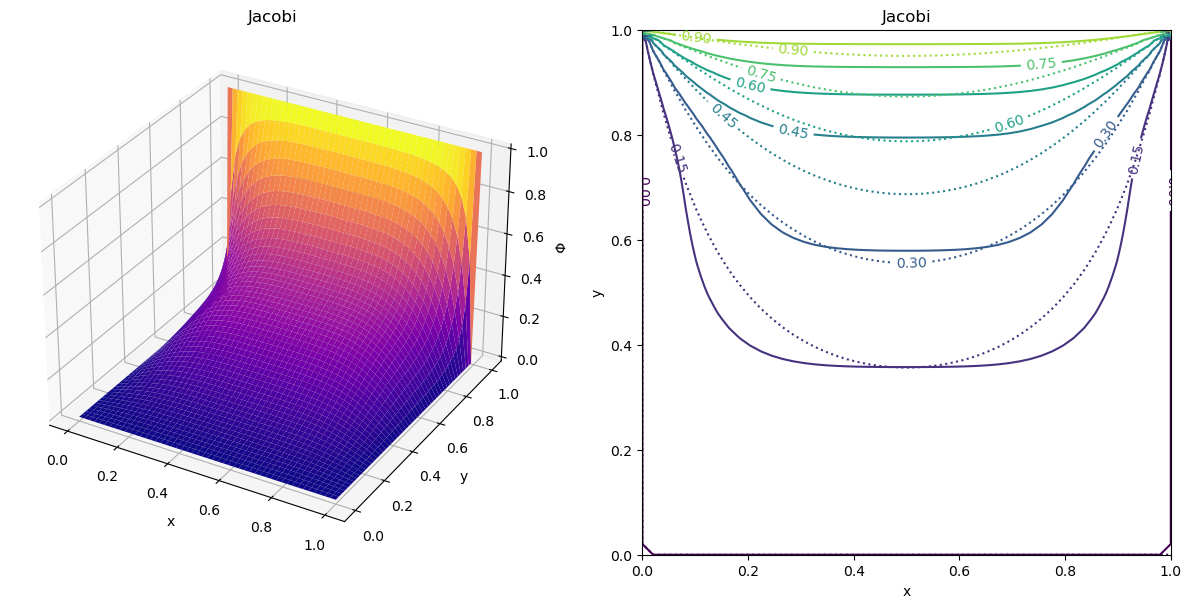

In [10]:
# Jacobi method:
phi_jac=laplace_relax(x,y,nMax,phi0,method='jacobi')

# Plots
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2,)

# 3D plot:
ax0.plot_surface(yy,xx,phi_jac,cmap=mycmap)
# Contour plots
CS_jacobi=ax1.contour(yy,xx,phi_jac)
ax1.clabel(CS_jacobi)
CS_analytic=ax1.contour(xx,yy,analytic_sol,linestyles=':')
ax1.clabel(CS_analytic)

# Label axes
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel(r'$\Phi$')
ax0.set_title('Jacobi')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Jacobi')

plt.savefig('laplace_jacobi.pdf',bbox_inches='tight')
plt.show()

In [ ]:
# GS method:
phi_gs=laplace_relax(x,y,nMax,phi0,method='gs')

# Plots
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2,)

# 3D plot:
ax0.plot_surface(yy,xx,phi_gs,cmap=mycmap)
# Contour plots
CS_gs=ax1.contour(yy,xx,phi_gs)
ax1.clabel(CS_gs)
CS_analytic=ax1.contour(xx,yy,analytic_sol,linestyles=':')
ax1.clabel(CS_analytic)


# Label axes
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel(r'$\Phi$')
ax0.set_title('Gauss-Seidel')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Gauss-Seidel')

plt.savefig('laplace_gs.pdf',bbox_inches='tight')
plt.show()

In [ ]:
# SOR method:
phi_sor=laplace_relax(x,y,nMax,phi0,method='sor')

# Plots
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2,)

# 3D plot:
ax0.plot_surface(yy,xx,phi_sor,cmap=mycmap)
# Contour plots
CS_sor=ax1.contour(yy,xx,phi_sor)
ax1.clabel(CS_sor)
CS_analytic=ax1.contour(xx,yy,analytic_sol,linestyles=':')
ax1.clabel(CS_analytic)



# Label axes
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel(r'$\Phi$')
ax0.set_title('Simultaneous Overrelaxation')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Simultaneous Overrelaxation')

plt.savefig('laplace_sor.pdf',bbox_inches='tight')
plt.show()